# Homework 1

We'll use the first assignment to make sure everyone is comfortable with some basic python.  We'll be doing all of our HW assignments in Jupyter notebooks, and submitting assigments by committing notebooks to your own gitlab repository (that you've shared with me).  

The first part of a notebook should always be the libraries we'll use in the rest of the notebook.  We include them at the top so we know what packages we may need to download and/or install.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math

If we're working in Google Colab, we'll also want to give Colab access to our Google Drive space, so that we can get other python code, data files, and other things that may be needed as part of the assignment.  Executing the cell below should open a browser window that prompts you to connect the notebook to Google Drive.

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')

We should see "Mounted at /content/gdrive" above if everything worked.  Now try to create a file, put something into it, check that it worked, then remove the file:

In [ ]:
if IN_COLAB:
    !echo "PHYS 152 is the best!" > myHW1test.txt    # Create a new file that contains some text
    !ls .                                            # Check that the file was created
    !cat myHW1test.txt                               # Look at the contents of the file
    !rm myHW1test.txt                                # Remove the file
    !ls .                                            # Check that the file was removed

# Some Basics

First let's go through some basics of python, numpy, and plotting.  I assume a basic familiarity with python, so we'll start right up with numerical methods.


In [2]:
def create_python_array(n=100):
    y = []
    for x in range(n):
        y.append(math.sin(math.pi * x / n))
    return y

In [3]:
%time y1=create_python_array(int(1e6))

CPU times: user 257 ms, sys: 22.6 ms, total: 279 ms
Wall time: 282 ms


This gives us a list of values, which can be manipulated in all sorts of crazy ways:

In [4]:
y1[2]="This is not a number"
y1.append(-1)

Now let's do something similar with numpy arrays:

In [5]:
def create_numpy_array(n=100):
    x = np.arange(n)
    y = np.sin(np.pi * x / n)
    return x,y

In [6]:
%time x,y2=create_numpy_array(int(1e6))

CPU times: user 22.2 ms, sys: 10.7 ms, total: 32.9 ms
Wall time: 31.6 ms


This went much faster, and now this structure can only hold numbers.  Note the use of `np.arange(n)`, which made an array integers from `0` to `n-1`:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can use `np.linspace` to create an array of floats with some constant spacing.  Note it takes 11 steps to go from 0 to 1.0 (inclusive) in steps of 0.1!

In [8]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

With this, now we can plot the results of our functions above:

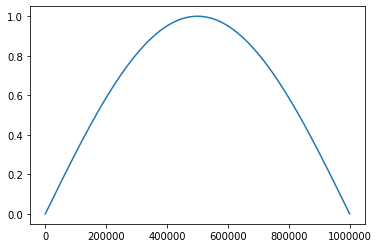

In [9]:
plt.plot(x,y2)

This is a start, but let's make this a proper plot, with some axis labels and so on.

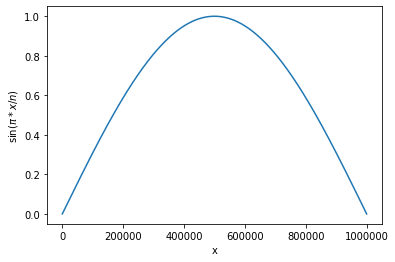

In [10]:
plt.plot(x,y2)
plt.ylabel("$\sin(\pi*x/n)$")
plt.xlabel("x")
plt.show()

An even simpler way would be to plot the function directly, and in this example we'll use `np.linspace` and not divide by `n`:

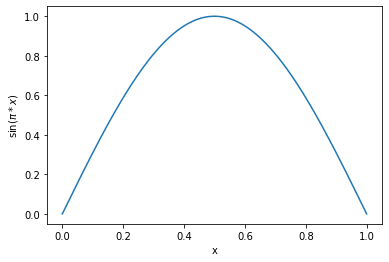

In [11]:
def create_numpy_array_2(xvalues):
  y=np.sin(math.pi*xvalues)
  return y

x3=np.linspace(0,1,int(1e6))
plt.plot(x3,create_numpy_array_2(x3))
plt.ylabel("$\sin(\pi*x)$")
plt.xlabel("x")
plt.show()

Let's overlay two plots, say `sin` and `cos` to see what they both look like:

/Users/ngokhang2000/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


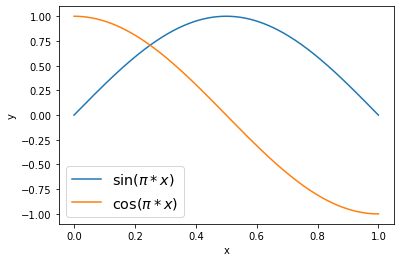

In [12]:
plt.plot(x3,np.sin(math.pi*x3),label="$\sin(\pi*x)$")
plt.plot(x3,np.cos(math.pi*x3),label="$\cos(\pi*x)$")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(fontsize='x-large')
plt.show()

We can also make histograms, showing the frequency of certain elements in a data sample:

Text(0, 0.5, 'Entries/Bin')

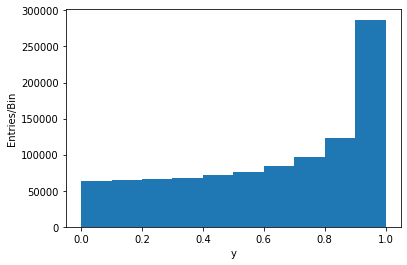

In [13]:
counts,bins,_=plt.hist(y2,bins=10,range=(0,1))
plt.xlabel("y")
plt.ylabel("Entries/Bin")

where now we have access to the contents of the histogram:

In [14]:
print(counts) # the "Entries/Bin" above
print(bins)   # the edges of the bins

[ 63769.  64420.  65784.  68006.  71354.  76332.  83968.  96702. 122532.
 287133.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


For our purposes, it is often useful to be able to normalize the distribution to unit area, by using the `density` option:

[0.63769 0.6442  0.65784 0.68006 0.71354 0.76332 0.83968 0.96702 1.22532
 2.87133]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


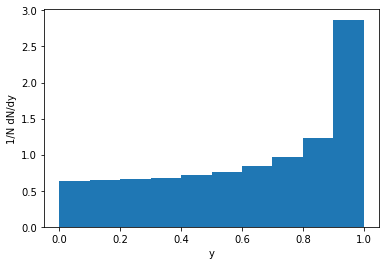

In [15]:
counts,bins,_=plt.hist(y2,bins=10,range=(0,1),density=True)
plt.xlabel("y")
plt.ylabel("1/N dN/dy")
print(counts) # the "Entries/Bin" above
print(bins)   # the edges of the bins

# Problem 1 (30 points)


Make a plot showing the different activtation functions we discussed in class, in the range from -3 to 3:

*   Sigmoid
*   tanh
*   ReLU



Text(0, 0.5, 'max(0,x)')

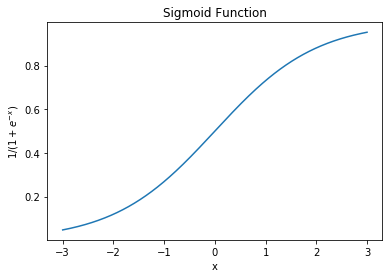

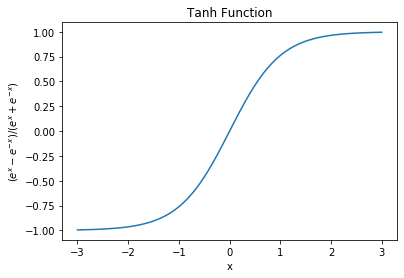

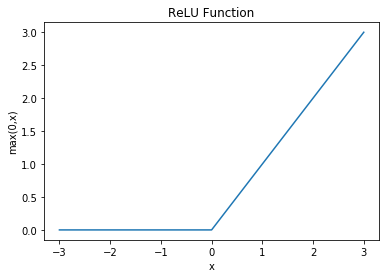

In [16]:
# your code here
x = np.linspace(-3,3,1000) #1d array from -3 to 3
sigmoid = 1/(1+np.exp(-x)) #1d array containing sigmoid function vals
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) #1d array containing tanh function vals
ReLU = np.maximum(0,x) #1d array containing ReLU function vals

plt.figure(0) #plot sigmoid
plt.plot(x,sigmoid) 
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("$1/(1+e^{-x})$")

plt.figure(1) #plot tanh
plt.plot(x,tanh)
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("$(e^{x}-e^{-x})/(e^{x}+e^{-x})$")

plt.figure(2) #plot ReLU 
plt.plot(x,ReLU)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("max(0,x)")

# Vectors, Matrices, and Tensors in Python

We can create more than just lists of numbers:

In [17]:
vector = np.ones(shape=(4,))
matrix = np.ones(shape=(3, 4))
tensor = np.ones(shape=(2, 3, 4))

In [18]:
print(vector)

[1. 1. 1. 1.]


In [19]:
print(matrix)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [20]:
print(tensor)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


We can access different elements of these objects using indices:

In [21]:
vector[1]=9
print(vector)

[1. 9. 1. 1.]


In [22]:
matrix[1,:]=2 # single row
print(matrix)

[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [1. 1. 1. 1.]]


In [23]:
matrix[:,3]=4 # single column
print(matrix)

[[1. 1. 1. 4.]
 [2. 2. 2. 4.]
 [1. 1. 1. 4.]]


In [24]:
matrix.T # transpose

array([[1., 2., 1.],
       [1., 2., 1.],
       [1., 2., 1.],
       [4., 4., 4.]])

In [25]:
tensor[0,:2,:3]=5 # subsets of a matrix, up to (but not including) row 2 and up to (but not including) column 3 in matrix 0
print(tensor)

[[[5. 5. 5. 1.]
  [5. 5. 5. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


We can use dot products too:

In [26]:
magnitude=vector.dot(vector)
print(magnitude)

84.0


In [27]:
rotatedvector=matrix.dot(vector)
print(rotatedvector)

[15. 26. 15.]


In [28]:
matrix.dot(matrix.T)

array([[19., 22., 19.],
       [22., 28., 22.],
       [19., 22., 19.]])

We can use `np.einsum` to do something fancier, and evaluate expressions like $x^{ij}y_{jk}=z^{i}_{k}$, where repeated indices are summed over (called Einstein summation notation, seen often in General Relativity).  You can find some documenation on `numpy.einsum` [here](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html).

In [29]:
x=np.arange(16).reshape(4,4) # make a matrix out of consecutive numbers
y=(np.arange(16)+16).reshape(4,4)
print(x)
print(y)
print(np.einsum('ij,jk',x,y))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[[ 152  158  164  170]
 [ 504  526  548  570]
 [ 856  894  932  970]
 [1208 1262 1316 1370]]


# Problem 2 (30 points)

Let's write a function that will evaluate the tensor expression $g^{il}\Gamma_{ki}^{m}x^{k}$.  Use `np.einsum` to do the evaluation within the skeleton function below.

In [30]:
def tensor_expr(g, Gamma, x, D=4):
    """Evaluate the tensor expression above.
    
    Parameters
    ----------
    g : array
        Numpy array of shape (D, D)
    Gamma : array
        Numpy array of shape (D, D, D)
    x : array
        Numpy array of shape (D,)
    D : int
        Dimension of input tensors.
        
    Returns
    -------
    array
        Numpy array of shape (D, D) that evaluates the tensor expression.
    """
    assert g.shape == (D, D)
    assert Gamma.shape == (D, D, D)
    assert x.shape == (D,)
    
    result = np.einsum('jkl,l->jk',np.einsum('ij,kli->jkl',g,Gamma),x) #i=i,j=l,k=m,l=k in ijkl notation
    print("Tensor Expression = {0}".format(result))
    
    return(result)

In [31]:
# A correct solution should pass the following tests:
g = np.arange(4 ** 2).reshape(4, 4)
Gamma = np.arange(4 ** 3).reshape(4, 4, 4)
x = np.arange(4)
y = tensor_expr(g, Gamma, x)
assert np.array_equal(
    y,
    [[ 1680,  3984,  6288,  8592], [ 1940,  4628,  7316, 10004],
     [ 2200,  5272,  8344, 11416], [ 2460,  5916,  9372, 12828]])



Tensor Expression = [[ 1680  3984  6288  8592]
 [ 1940  4628  7316 10004]
 [ 2200  5272  8344 11416]
 [ 2460  5916  9372 12828]]


# Loss functions

We calculated the objective function (also called the loss or loss function, the error, and other names) as:

$$\mathcal{L} = -\frac{1}{m}\sum_{j=1}^{m} \left[\sum_{i=1}^{k} p_{i}\ln q_{i}\right]_{j}$$

where $j$ is iterating over events, and $i$ is iterating over categories.  But we can more generally write this as:

$$\mathcal{L} = \frac{1}{m}\sum_{j=1}^{m} \left[H(p,q)\right]_{j}$$

where $H(p,q)$ is any appropriate objective function.  Depending on the nature of $H$, the objective function $\mathcal{L}$ for a given set of events may be easier/harder to calculate.  

For example, let's consider the case where $H(p,q)$ is just defined by the mean-square-error:

$$ \mathcal{L}=\frac{1}{m}\sum_{j=1}^{m} \left[ \left(f(x_j)-y(x_j)\right)^2 \right]_{j}$$

where $f(x_j)$ represents the output of the algorithm and $y(x_j)$ represents the true classification label for event with features $x_j$.  

If we're not interested in classification, but instead we want to predict a value on a continuum, then that's a problem for *regression*.  In that case, we adjust our interpretation of the elements in the formula above: `m` is the number of data points in a distribution that we're comparing to, rather than the number of events that make up the distribution.  

# Problem 3 (40 points)

Let's get some practice computing $\mathcal{L}$ numerically.  We'll create a dataset and fit it using several functional forms, testing the objective function as we go to see which one performs best.

In [6]:
N=1000 # number of events to generate
generator = np.random.RandomState(seed=123)
dataset=generator.normal(loc=2,scale=3,size=N)

Plot the normal distribution above, saving the bin entries as `counts` and the bin edges as `bins`.  It's best to normalize this distribution to unit area, otherwise the results below may become unstable.

Text(0, 0.5, '1/N dN/dx')

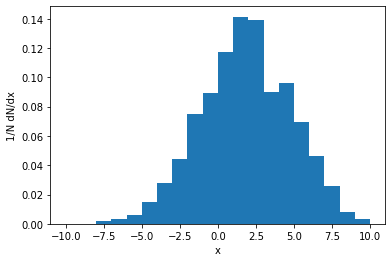

In [7]:
m=20 # number of bins in the histogram
histrange=(-10,10) # range of the histogram

counts,bins,_ = plt.hist(dataset,bins=m,range=histrange,density=True)
plt.xlabel('x')
plt.ylabel("1/N dN/dx")

Now compute the objective function (using the mean-square-error formula above) assuming: 

$$f(x)=\frac{N}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$

guessing that the mean is $\mu=2.5$ and the width is $\sigma=2.5$.  Remember, in this case we're going to iterate over the histogram bins, not the individual events!  Finally, keep in mind that the bin contents should really be considered to be at the bin *centers*, not the bin *edges*.

In [10]:
def loss_func(x,m,mu,sigma,counts):
  """
  Parameters
  ----------
  x: ndarray, req
    1d-array containing center of each bin.
  m: int, req
    Number of bins.
  mu: int|float, reg
    Mean of f(x).
  sigma: int|float, reg
    Width of f(x).
  counts: ndarray, req
    1d-array containing counts of each bin.

  Returns
  ----------
  L: Value calculated by the loss function.

  """
  Fx_sub_Yx_sq = [] #empty list to stores (f(x)-y(x))^2 values

  for index in np.arange(len(x)): #iterate through each bin center, x
    f_x = (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-1/(2*(sigma**2)))*((x[index]-mu)**2)) #output of algorithm
    y_x = counts[index] #true classification label
    Fx_sub_Yx_sq.append((f_x-y_x)**2) #append value to list Fx_sub_Yx_sq 
  
  L = np.sum(np.array(Fx_sub_Yx_sq),axis=0)/m #calculate L using given formula
  
  return L


In [11]:
bins_center = np.arange(-9.5,10.5,1) #bin contents should be considered at bin centers!
mu = 2.5 #estimated mu value
sigma = 2.5 #estimated sigma value
obj_func = loss_func(bins_center,m,mu,sigma,counts) #Calculated L w/ mu=2.5 and sigma=2.5
print("Value of the objective function: {0}".format(obj_func))


Value of the objective function: 0.0003157191991299284


Now put this inside of a loop, and check values of the mean in steps of 0.1 between 0 and 5 to find the minimum value of the objective function.  Keep the guess that $\sigma=2.5$ as before:

In [36]:
def LFunc_MuSteps(mu_steps):
  """
  Parameters
  ----------
  mu_steps: ndarray, req
    Mu from 0.1 to 5.0 in steps of 0.1.

  Returns
  ----------
  LMin: Minimum value of the objective function.

  LMin_index: Index of LMin in LFunc_MuSteps_list.

  """

  LFunc_MuSteps_list = [] #empty list to store the L of each iteration
  for new_mu in mu_steps: #iterate through all mu 
    L_MuSteps = loss_func(bins_center,m,new_mu,sigma,counts)
    LFunc_MuSteps_list.append(L_MuSteps)
  
  LMin = min(LFunc_MuSteps_list) #minimum value of the objective function
  LMin_index = list(LFunc_MuSteps_list).index(min(LFunc_MuSteps_list)) #index of minimum value of the objective function

  print("Minimum value of the objective function: {0}".format(LMin))

  return LMin,LMin_index

In [37]:
mu_steps = np.arange(0.1,5.1,0.1) #mu from 0.1 to 5.0, in step of 0.1
LMin,LMin_index = LFunc_MuSteps(mu_steps)
print("Best guess of mu: {0}".format(mu_steps[LMin_index]))

Minimum value of the objective function: 0.00018630407744979577
Best guess of mu: 1.9000000000000001


Now do the same thing with the width $\sigma$, scanning from 0.1 to 5 in steps of 0.1, this time assuming for $\mu$ the best guess of $\mu$ from the loop above:

In [38]:
def LFunc_SigmaSteps(sigma_steps,opt_mu):
  """
  Parameters
  ----------
  sigma_steps: ndarray, req
    Sigma from 0.1 to 5.0 in steps of 0.1.

  opt_mu: float, req
    Best guess of mu from previous loop.

  Returns
  ----------
  LMin: Minimum value of the objective function.

  LMin_index: Index of LMin in LFunc_SigmaSteps_list.
  
  """

  LFunc_SigmaSteps_list = [] #empty list to store the L of each iteration
  for new_sigma in sigma_steps: #iterate through all sigma
    L_SigmaStep = loss_func(bins_center,m,opt_mu,new_sigma,counts)
    LFunc_SigmaSteps_list.append(L_SigmaStep)

  LMin = min(LFunc_SigmaSteps_list) #minimum value of the objective function
  LMin_index = list(LFunc_SigmaSteps_list).index(min(LFunc_SigmaSteps_list)) #index of minimum value of the objective function
    
  print("Minimum value of the objective function: {0}".format(LMin))

  return LMin,LMin_index


In [39]:
sigma_steps = np.arange(0.1,5.1,0.1) #sigma from 0.1 to 5.0, in step of 0.1
LMin_sigma,LMin_sigma_index = LFunc_SigmaSteps(sigma_steps,mu_steps[LMin_index])
print("Best guess of sigma: {0}".format(sigma_steps[LMin_sigma_index]))

Minimum value of the objective function: 4.973189465534081e-05
Best guess of sigma: 3.0000000000000004


This is a bit of a brute-force approach.  We'll explore gradient descent for finding the local minima in a future homework.